In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('data/winning_squads.csv')
df.head()

,age,club,country,player,year
0,28,Nacional,Uruguay,José Leandro Andrade,1930
1,28,Peñarol,Uruguay,Peregrino Anselmo,1930
2,25,Rampla Juniors,Uruguay,Enrique Ballestrero,1930
3,24,Miramar Misiones,Uruguay,Juan Carlos Calvo,1930
4,26,Peñarol,Uruguay,Miguel Capuccini,1930


In [4]:
df['club'].value_counts()[:15]

Juventus            25
Bayern Munich       24
Roma                16
Santos              15
Peñarol             14
São Paulo           13
Nacional            13
Real Madrid         11
Barcelona           11
Botafogo            11
Milan               10
Internazionale       9
River Plate          9
Ambrosiana-Inter     9
Palmeiras            9
Name: club, dtype: int64

In [5]:
aa = df['club'].value_counts()[:5]

In [6]:
aa.values

array([25, 24, 16, 15, 14])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


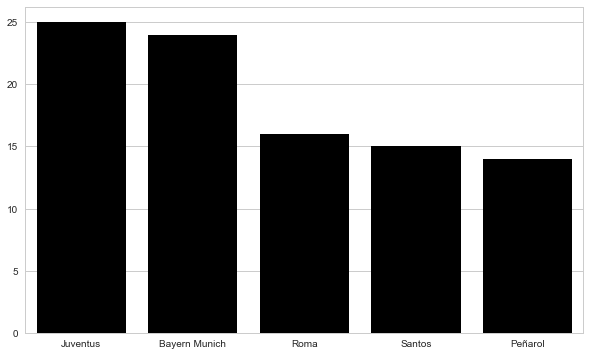

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(aa.index, aa.values, color='black')

In [8]:
top15_clubs = list(df['club'].value_counts()[:15].index)

In [9]:
df[df['club'] == 'Juventus']['country'].value_counts()

Italy     22
France     3
Name: country, dtype: int64

In [10]:
for club in top15_clubs:
    country_counts = df[df['club'] == club]['country'].value_counts()
    print("{}:\n--------------------\n{}\n".format(club, country_counts))

Juventus:
--------------------
Italy     22
France     3
Name: country, dtype: int64

Bayern Munich:
--------------------
West Germany    14
Germany          7
France           2
Brazil           1
Name: country, dtype: int64

Roma:
--------------------
Italy           11
Brazil           2
West Germany     2
France           1
Name: country, dtype: int64

Santos:
--------------------
Brazil    15
Name: country, dtype: int64

Peñarol:
--------------------
Uruguay    14
Name: country, dtype: int64

São Paulo:
--------------------
Brazil    13
Name: country, dtype: int64

Nacional:
--------------------
Uruguay    13
Name: country, dtype: int64

Real Madrid:
--------------------
Spain           5
France          2
Brazil          1
Germany         1
Argentina       1
West Germany    1
Name: country, dtype: int64

Barcelona:
--------------------
Spain     7
Brazil    2
France    2
Name: country, dtype: int64

Botafogo:
--------------------
Brazil    11
Name: country, dtype: int64

Milan:
-

Ambrosiana-Inter and Internazionale are same: Inter Milan. Germany and West Germany should be considered same.

In [11]:
def correct_club(x):
    if x == "Ambrosiana-Inter" or x == "Internazionale":
        x = "Inter Milan"
    return x

def correct_country(x):
    if x == "West Germany":
        x = "Germany"
    return x

In [12]:
df['country'].value_counts()

Brazil          111
Italy            89
West Germany     66
France           45
Argentina        44
Uruguay          44
Germany          23
Spain            23
England          22
Name: country, dtype: int64

In [13]:
df['club'] = df['club'].apply(correct_club)
df['country'] = df['country'].apply(correct_country)

In [14]:
df['country'].value_counts()

Brazil       111
Germany       89
Italy         89
France        45
Argentina     44
Uruguay       44
Spain         23
England       22
Name: country, dtype: int64

In [15]:
df['club'].value_counts()[:11]

Juventus         25
Bayern Munich    24
Inter Milan      20
Roma             16
Santos           15
Peñarol          14
Nacional         13
São Paulo        13
Real Madrid      11
Barcelona        11
Botafogo         11
Name: club, dtype: int64

## Visualization

In [16]:
import plotly
import plotly.graph_objs as go
from plotly import tools

In [17]:
plotly.offline.init_notebook_mode(connected=True)

In [18]:
top_clubs_ser = df['club'].value_counts()[:11]

In [19]:
top_clubs_ser

Juventus         25
Bayern Munich    24
Inter Milan      20
Roma             16
Santos           15
Peñarol          14
Nacional         13
São Paulo        13
Real Madrid      11
Barcelona        11
Botafogo         11
Name: club, dtype: int64

In [20]:
club_countries = ['Italy','Germany','Italy','Italy','Brazil','Uruguay','Brazil','Uruguay','Spain','Brazil','Spain']
club_text = []
for i in range(11):
    club_text.append(list(top_clubs_ser.index)[i] + " (" + club_countries[i] + ")")
club_text

['Juventus (Italy)',
 'Bayern Munich (Germany)',
 'Inter Milan (Italy)',
 'Roma (Italy)',
 'Santos (Brazil)',
 'Peñarol (Uruguay)',
 'Nacional (Brazil)',
 'São Paulo (Uruguay)',
 'Real Madrid (Spain)',
 'Barcelona (Brazil)',
 'Botafogo (Spain)']

In [25]:
trace = go.Bar(
    y = top_clubs_ser.index,
    x = top_clubs_ser.values,
    orientation = 'h',
    width = 0.6,
    text = club_text,
    textposition = 'auto',
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    )
)

data = [trace]

layout = dict(
    title = 'Football Clubs Contributing Most World Cup Winners',
    yaxis = dict(
        autorange = 'reversed',
        showticklabels = False
    )
)

plotly.offline.iplot({'data':data, 'layout':layout})

In [26]:
# to save svg image of above graph
#plotly.offline.iplot({'data' : data, 'layout' : layout}, show_link=False, image='jpeg', image_height=1200, image_width=800)

In [27]:
plotly.offline.plot({'data' : data, 'layout' : layout}, validate=False, show_link=False, include_plotlyjs=False, output_type='div')

'<div id="1a010934-9739-41eb-bcdf-124bc9c05bd7" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("1a010934-9739-41eb-bcdf-124bc9c05bd7", [{"marker": {"color": "rgba(50, 171, 96, 0.6)", "line": {"color": "rgba(50, 171, 96, 1.0)", "width": 1}}, "orientation": "h", "text": ["Juventus (Italy)", "Bayern Munich (Germany)", "Inter Milan (Italy)", "Roma (Italy)", "Santos (Brazil)", "Pe\\u00f1arol (Uruguay)", "Nacional (Brazil)", "S\\u00e3o Paulo (Uruguay)", "Real Madrid (Spain)", "Barcelona (Brazil)", "Botafogo (Spain)"], "textposition": "auto", "width": 0.6, "x": [25.0, 24.0, 20.0, 16.0, 15.0, 14.0, 13.0, 13.0, 11.0, 11.0, 11.0], "y": ["Juventus", "Bayern Munich", "Inter Milan", "Roma", "Santos", "Pe\\u00f1arol", "Nacional", "S\\u00e3o Paulo", "Real Madrid", "Barcelona", "Botafogo"], "type": "bar"}], {"title": "Football Clubs Contributing Most Worl